# Работа с изображениями

In [36]:
import sys
print(sys.executable)

path_image = "image/1.png"

/home/maksim/develops/python/env1/bin/python


In [6]:
!which python 

/home/maksim/develops/python/env1/bin/python


# Загрузка и отображение

## matplotlib

Matplotlib напрямую лучше работает с PNG, для других форматов используйте Pillow.  

plt.imshow() принимает как numpy-массив, так и PIL Image.  

plt.axis('off') отключает отображение осей вокруг изображения.   

Для отображения нескольких изображений используйте plt.figure() и plt.subplot().  

Можно сохранять изображения и графики через plt.imsave() и plt.savefig()  

In [1]:
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


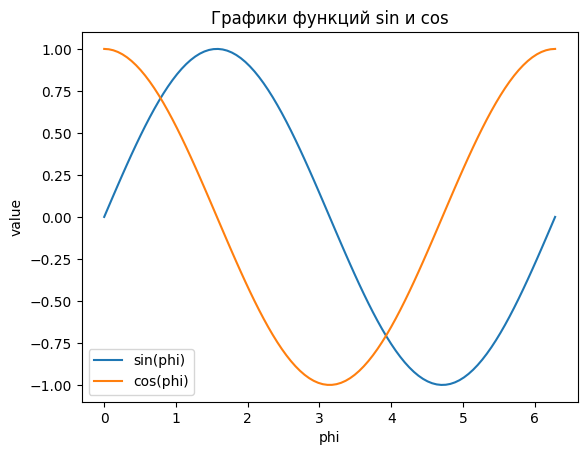

In [2]:
import numpy as np
import matplotlib.pyplot as plt

phi = np.linspace(0, 2 * np.pi, 100)
plt.plot(phi, np.sin(phi), label='sin(phi)')
plt.plot(phi, np.cos(phi), label='cos(phi)')

plt.savefig('plot.png')  # Сохранение фигуры

plt.xlabel('phi')
plt.ylabel('value')
plt.title('Графики функций sin и cos')
plt.legend()
plt.show()



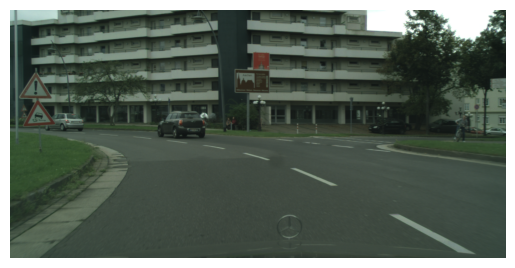

In [38]:
# Загрузка изображения
# 1-й вариант
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_plot = mpimg.imread(path_image)  # img — это numpy-массив с данными изображения.


plt.imshow(image_plot)
plt.axis('off')  # Отключить оси, если нужно
plt.show()


In [39]:
# Сохранение
plt.imsave('image/output.jpg', image_plot)


## Pil

Pillow позволяет работать с широким спектром форматов и интегрируется с matplotlib .  

 

In [40]:
# установка 
# !pip install pillow
# !conda install -c anaconda pillow

from PIL import Image
print(Image.__version__)


11.3.0


In [ ]:
from PIL import Image

# Открыть изображение любого поддерживаемого формата
image_pil = Image.open(path_image)

# Отображение изображения
image_pil.show();


Gtk-Message: 11:19:18.072: Failed to load module "canberra-gtk-module"
Gtk-Message: 11:19:18.889: Failed to load module "canberra-gtk-module"


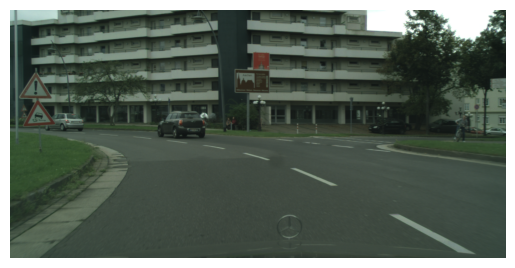

In [43]:
plt.imshow(image_pil)
plt.axis('off')  # Отключить оси, если нужно
plt.show()


In [10]:
# Получение информации
print(image_pil.format)  # Формат файла (например, JPEG)
print(image_pil.size)    # Размер (ширина, высота)
print(image_pil.mode)    # Цветовой режим (RGB, L, RGBA и др.)


PNG
(1024, 512)
RGB


In [ ]:
# Сохранение в другом формате
image_pil.save("image/output.jpg")  # Сохранить как PNG


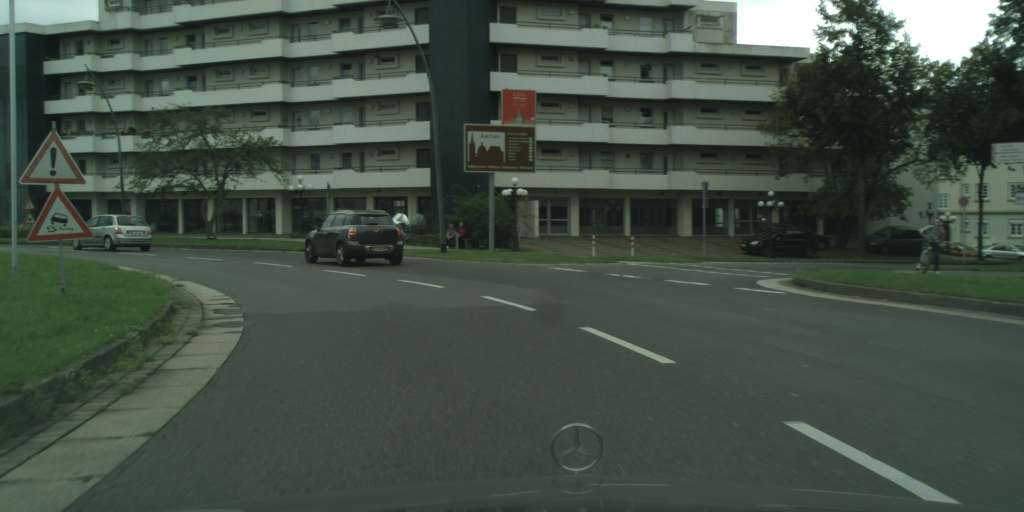

In [12]:
# вывод изображения
image_pil


## OpenCV

In [2]:
# Установка
# !conda install -c conda-forge opencv  # с conda
# pip install opencv-python  # с pip


import cv2
print(cv2.__version__)


4.12.0


In [44]:
import cv2

# Загрузка изображения в цвете (по умолчанию BGR)
img_cv2 = cv2.imread(path_image, cv2.IMREAD_COLOR)


if img_cv2 is None:
    print("Ошибка: файл не найден или не удалось открыть изображение")
else:

    cv2.imshow("Image", img_cv2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


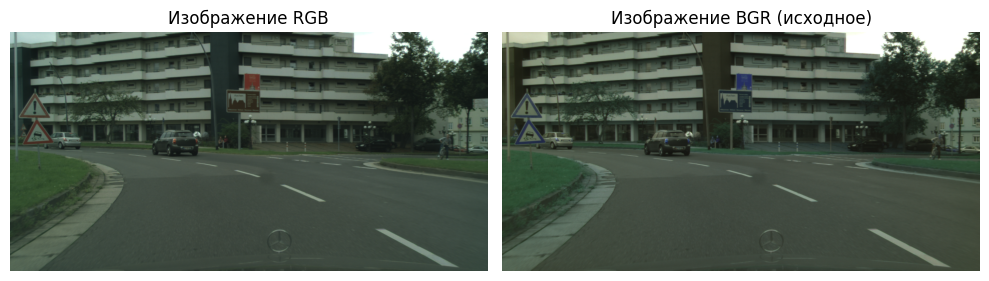

In [45]:
import cv2
import matplotlib.pyplot as plt

# Загрузка изображения
img_cv2 = cv2.imread(path_image, cv2.IMREAD_COLOR)

if img_cv2 is None:
    print("Ошибка: файл не найден или не удалось открыть изображение")
else:
    # Конвертация из BGR в RGB для корректного отображения
    img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

    # Создаём фигуру с двумя подграфиками в один ряд
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Первый график — изображение в RGB
    axes[0].imshow(img_rgb)
    axes[0].set_title("Изображение RGB")
    axes[0].axis('off')  # Отключаем оси для красоты

    # Второй график — исходное изображение в BGR (будет отображено некорректно по цвету)
    axes[1].imshow(img_cv2)
    axes[1].set_title("Изображение BGR (исходное)")
    axes[1].axis('off')

    plt.tight_layout()  # Чтобы подписи не налезали
    plt.show()


# Преобразование изображения в тензор

## PIL

In [46]:
from PIL import Image
import torchvision.transforms as transforms

# Загружаем изображение через PIL
img = Image.open(path_image).convert("RGB")

# Определяем преобразования: PIL Image -> Tensor + нормализация (опционально)
transform = transforms.Compose([
    transforms.ToTensor(),  # конвертирует в тензор и нормализует в [0,1]
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # если нужно
])

img_tensor = transform(img)  # shape: [C, H, W], dtype=torch.float32
print(img_tensor.shape)

torch.Size([3, 512, 1024])


## cv2

In [47]:
import cv2
import torch

# Загружаем изображение в BGR формате
img_cv2 = cv2.imread(path_image)

# Конвертируем BGR -> RGB
img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

# Конвертируем numpy в тензор, меняем порядок осей HWC -> CHW, нормализуем в [0,1]
img_tensor = torch.from_numpy(img_rgb).permute(2, 0, 1).float() / 255.0
print(img_tensor.shape)


torch.Size([3, 512, 1024])


## torchvision

In [28]:
from torchvision import datasets, transforms

# transform = transforms.Compose([
#     transforms.ToTensor(),
# ])

# dataset = datasets.ImageFolder(root='path_to_folder', transform=transform)
# img_tensor, label = dataset[0]
# print(img_tensor.shape, label)


## transforms.v2  и PIL

In [48]:
from PIL import Image
import torchvision.transforms.v2 as T
import torch

img = Image.open(path_image).convert("RGB")

transform = T.Compose([
    T.ToImage(),  # PIL -> Tensor
    T.ToDtype(torch.float32, scale=True),  # нормализация в [0,1]
])

img_tensor = transform(img) # добавляем batch размер
print(img_tensor.shape)


torch.Size([3, 512, 1024])


# Вывод изображения с разных источников (Универсальное отображение)

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def show_image(img, title=None):
    """
    Универсальная функция для отображения изображения.
    
    Параметры:
    img - путь к изображению (str) или объект PIL.Image или numpy.ndarray или тензор (PyTorch, TensorFlow)
    title - заголовок для изображения (str, опционально)
    """
    # Если строка - считаем, что это путь к файлу
    if isinstance(img, str):
        img_cv2 = cv2.imread(img, cv2.IMREAD_COLOR)
        if img_cv2 is None:
            raise FileNotFoundError(f"Файл не найден или не удалось открыть: {img}")
        img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
    
    # Если PIL Image
    elif isinstance(img, Image.Image):
        img_rgb = np.array(img.convert('RGB'))
    
    # Если numpy массив
    elif isinstance(img, np.ndarray):
        # Если 2D - считаем, что grayscale, просто показываем
        if img.ndim == 2:
            img_rgb = img
        # Если 3D - проверяем формат каналов
        elif img.shape[2] == 3:
            # Проверим, BGR ли это (OpenCV), предположим, что если тип uint8 и значения в 0-255, то BGR
            # Для универсальности сделаем преобразование из BGR в RGB
            if img.dtype == np.uint8:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            else:
                img_rgb = img
        else:
            raise ValueError("Неподдерживаемый формат numpy массива для изображения")
    
    # Если тензор (PyTorch или TensorFlow)
    else:
        try:
            # Попытка импортировать torch и tensorflow
            import torch
        except ImportError:
            torch = None
            tf = None
        
        # PyTorch tensor
        if torch is not None and isinstance(img, torch.Tensor):
            # Переводим в numpy
            img_np = img.detach().cpu().numpy()
            # Ожидаем формат CxHxW или HxW или HxWxC
            if img_np.ndim == 3:
                # Если первый канал - C, меняем на HWC
                if img_np.shape[0] == 3:
                    img_np = np.transpose(img_np, (1, 2, 0))
                img_rgb = img_np
            elif img_np.ndim == 2:
                img_rgb = img_np
            else:
                raise ValueError("Неподдерживаемый формат тензора PyTorch")
        
        else:
            raise TypeError("Тип изображения не поддерживается")
    
    # Отображение
    plt.imshow(img_rgb, cmap='gray' if img_rgb.ndim == 2 else None)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()


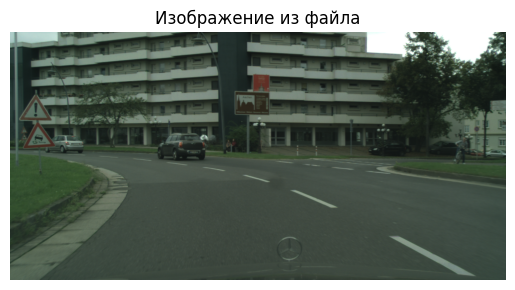

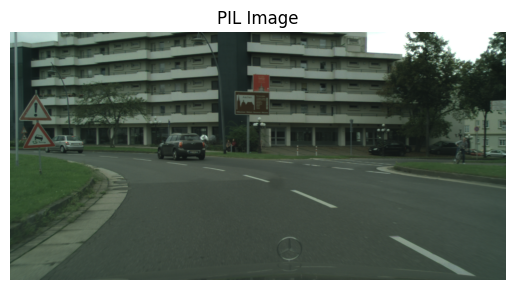

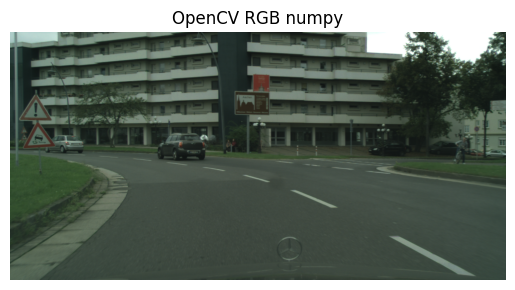

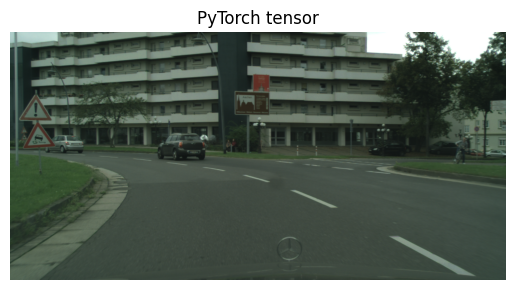

In [49]:
# Путь к файлу
show_image(path_image, title="Изображение из файла")

# PIL Image
from PIL import Image
pil_img = Image.open(path_image)
show_image(pil_img, title="PIL Image")

# numpy массив (OpenCV)
import cv2
img_cv2 = cv2.imread(path_image)
show_image(img_cv2, title="OpenCV RGB numpy")

# PyTorch tensor
import torch

show_image(img_tensor, title="PyTorch tensor")
